<a href="https://colab.research.google.com/github/profahad/Boston-Housing-Price-Predictor/blob/master/Capstone_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing drive access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing the dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/content/drive/My Drive/AI/2k19 - Paractice/Regression/Capstone Project/housing-v1.csv', names = names, delim_whitespace = True)
# dataset = dataset.drop(['ZN','INDUS','DIS'], axis = 1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

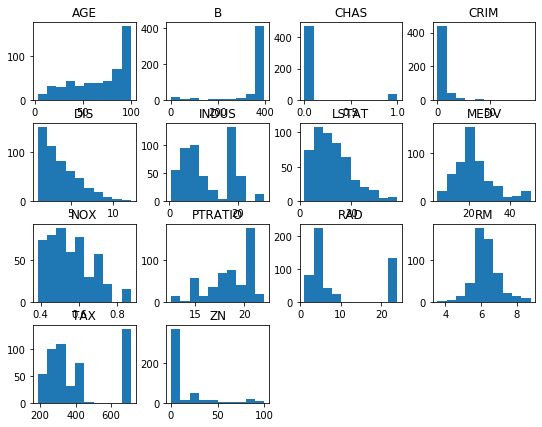

In [0]:
dataset.hist(bins=10,figsize=(9,7),grid=False);

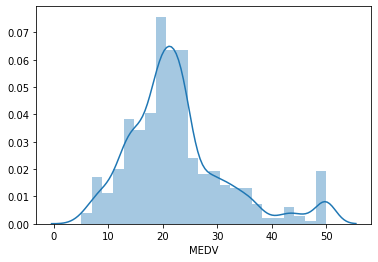

In [0]:
sns.distplot(dataset['MEDV']);

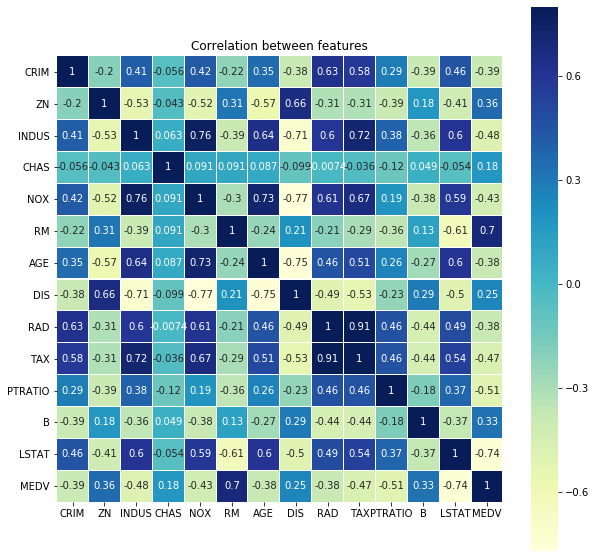

In [0]:
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

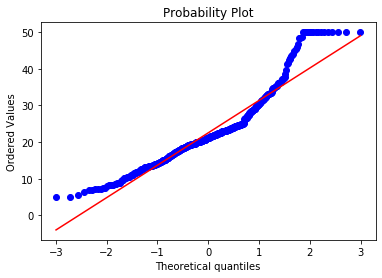

In [0]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(dataset['MEDV'], plot=plt)

In [0]:
# Building the optimal modal using backward Elimination
import statsmodels.api as sm
# Append Intercept/Constant on X dependents variables because OLS can't do this automatically.
X_ols = np.append(arr = np.ones((len(X),1), dtype = np.int), values = X, axis = 1)
# First Optimal X and find height P value and compare with P > 0.05. If yes then remove that dependent variable and repeat this. 
X_opt = X_ols[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Ordinary Least Squares
print(regressor_OLS.summary2())

X_opt = X_ols[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Ordinary Least Squares
print(regressor_OLS.summary2())

X_opt = X_ols[:, [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Ordinary Least Squares
print(regressor_OLS.summary2())

X_opt = X_ols[:, [0, 1, 4, 5, 6, 7, 9, 10, 11, 12, 13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Ordinary Least Squares
print(regressor_OLS.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.734    
Dependent Variable: y                AIC:                3025.6086
Date:               2020-01-05 07:27 BIC:                3084.7801
No. Observations:   506              Log-Likelihood:     -1498.8  
Df Model:           13               F-statistic:        108.1    
Df Residuals:       492              Prob (F-statistic): 6.72e-135
R-squared:          0.741            Scale:              22.518   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       36.4595    5.1035    7.1441  0.0000   26.4322   46.4868
x1          -0.1080    0.0329   -3.2865  0.0011   -0.1726   -0.0434
x2           0.0464    0.0137    3.3816  0.0008    0.0194    0.0734
x3           0.0206    0.0615    0.3343  0.7383   -0.1003    0.1414
x4    

In [0]:
# Best result we get when take all dependent variables
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [0]:
def printResults(regressorName, result):
  print('Regressor :', regressorName)
  print('Accuracy  :', "{0:.2f}".format(r2_score(result[0], result[1]) * 100.00), '%')


In [0]:
# Config Variables
testSize = 0.2
seed = 15

In [0]:
def multipleRegressor(X, y):
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = seed)  
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  # print('Accuracy : ', r2_score(y_test, y_pred) * 100.00, "%")
  return [y_test, y_pred]

def polynomialRegressor(X, y, degree = 2):
  poly_reg = PolynomialFeatures(degree = degree) # degree assume as power of X e.g 2,3,4...
  X_poly = poly_reg.fit_transform(X)
  poly_reg.fit(X_poly, y)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = testSize, random_state = seed)  
  # Setup poly features to linear modal
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  # print('Accuracy : ', (r2_score(y_test, y_pred) * 100.00), '%')
  return [y_test, y_pred]


def suppertVectorRegressor(X, y):
  y = np.array(y).reshape(-1,1)
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X = sc_X.fit_transform(X)
  y = sc_y.fit_transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = seed)  
  
  regressor = SVR(kernel = 'rbf', epsilon=0.1)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  y_test = sc_y.inverse_transform(y_test)
  y_pred = sc_y.inverse_transform(y_pred)
  y_test = y_test.reshape(-1)
  return [y_test, y_pred]

def decisionTreeRegressor(X, y):
  y = np.array(y).reshape(-1,1)
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X = sc_X.fit_transform(X)
  y = sc_y.fit_transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = seed)  
  regressor = DecisionTreeRegressor(random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  y_test = sc_y.inverse_transform(y_test)
  y_pred = sc_y.inverse_transform(y_pred)
  y_test = y_test.reshape(-1)
  return [y_test, y_pred]


def randomForestRegressor(X, y):
  y = np.array(y).reshape(-1,1)
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X = sc_X.fit_transform(X)
  y = sc_y.fit_transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = seed)  
  regressor = RandomForestRegressor(n_estimators=1000, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  y_test = sc_y.inverse_transform(y_test)
  y_pred = sc_y.inverse_transform(y_pred)
  y_test = y_test.reshape(-1)
  return [y_test, y_pred]

In [0]:
print('Regressors with Accuracy')
print('=====================================')
printResults('Multiple', multipleRegressor(X, y))
print('-------------------------------------')
printResults('Polynomial', polynomialRegressor(X, y, degree = 2))
print('-------------------------------------')
printResults('Support Vector Regressor', suppertVectorRegressor(X, y))
print('-------------------------------------')
printResults('Decision Tree Regressor', decisionTreeRegressor(X, y))
print('-------------------------------------')
printResults('Random Forest Regressor', randomForestRegressor(X, y))

Regressors with Accuracy
Regressor : Multiple
Accuracy  : 69.21 %
-------------------------------------
Regressor : Polynomial
Accuracy  : 86.53 %
-------------------------------------
Regressor : Support Vector Regressor
Accuracy  : 88.49 %
-------------------------------------
Regressor : Decision Tree Regressor
Accuracy  : 70.14 %
-------------------------------------
Regressor : Random Forest Regressor
Accuracy  : 85.52 %
